# Car Price Prediction
--------------------------------------------------------
Here we are working with 5 different Machine Learning techniques for prediction
--------------------
- Random Forest
----------------------
- Ridge Regression
------------------
- Lasso
------------
- KNN
----------
- XGBoost
-----------

In [49]:
#import packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import subprocess as sp
import sys,os,shutil,pickle,time 
from os.path  import join
plt.style.use('default')


In [2]:
#load the dataset.
df= pd.read_csv('vehicles.csv')
df.head() #show first 5 rows

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [3]:
df.shape

(539759, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
id              539759 non-null int64
url             539759 non-null object
region          539759 non-null object
region_url      539759 non-null object
price           539759 non-null int64
year            538772 non-null float64
manufacturer    516175 non-null object
model           531746 non-null object
condition       303707 non-null object
cylinders       321264 non-null object
fuel            536366 non-null object
odometer        440783 non-null float64
title_status    536819 non-null object
transmission    535786 non-null object
vin             315349 non-null object
drive           383987 non-null object
size            168550 non-null object
type            392290 non-null object
paint_color     365520 non-null object
image_url       539740 non-null object
description     539738 non-null object
county          0 non-null float64
state           539759 non-null obj

In [4]:
#drop the columns
df= df.drop(columns=['url','image_url', 'lat', 'long'], axis=1)

In [5]:
#display the list
list(df)

['id',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'vin',
 'drive',
 'size',
 'type',
 'paint_color',
 'description',
 'county',
 'state']

In [6]:
#count null values
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
county,53975900,100.000
size,37120900,68.773
condition,23605200,43.733
vin,22441000,41.576
cylinders,21849500,40.480
paint_color,17423900,32.281
drive,15577200,28.860
type,14746900,27.321
odometer,9897600,18.337
manufacturer,2358400,4.369


-------------------------------

Eliminate extreme values from price column
---------------------------------
--------------


In [7]:
df[df.price == 0].shape

(44689, 21)

In [8]:
df[df.price > 100000].shape

(498, 21)

In [9]:
df[df.price < 750].shape

(56084, 21)

In [10]:
df=df[(df.price < 100000) & (df.price >= 750 )]
df.shape

(483166, 21)

---------------------
Odometers higher than 300k and lower than 10, and models earlier than 1985 may not be good observations for a robust prediction:

In [11]:
df[df.odometer < 1000].shape

(8257, 21)

In [12]:
df[df.odometer < 1000].sample(20)

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,title_status,transmission,vin,drive,size,type,paint_color,description,county,state
6881,7079480655,western massachusetts,https://westernmass.craigslist.org,39900,2019.0,mercedes-benz,benz 3500 sprinter,NaN,6 cylinders,diesel,...,clean,automatic,FINANCING,rwd,NaN,van,white,*****BRAND NEW ONLY 50 MILES FULL FACTORY WARR...,NaN,ma
78193,7085408856,ventura county,https://ventura.craigslist.org,3988,2004.0,infiniti,qx60,excellent,6 cylinders,gas,...,clean,automatic,JNKCV51E93M303361,fwd,mid-size,sedan,silver,💬💬💬 HABLAMOS ESPAÑOL. FINANCIAMIENTO FACIL. 💬💬...,NaN,ca
245538,7086178310,chico,https://chico.craigslist.org,1000,2000.0,NaN,2000 bwm,fair,6 cylinders,gas,...,clean,automatic,NaN,rwd,compact,coupe,blue,2000 bmw 3235 series Mechanic special..... c...,NaN,ca
469117,7092287645,"st louis, MO",https://stlouis.craigslist.org,4000,1958.0,ford,custom 300,fair,8 cylinders,gas,...,clean,automatic,A8KG146012,rwd,full-size,sedan,black,Need finished 1958 ford custom 300 cash only c...,NaN,il
426245,7087556995,tulsa,https://tulsa.craigslist.org,32950,1971.0,toyota,land cruiser fj40,excellent,6 cylinders,gas,...,clean,manual,FJ40103259,4wd,NaN,SUV,red,1971 Toyota FJ-40 Land Cruiser 4WD was owned b...,NaN,ok
313568,7090401886,hanford-corcoran,https://hanford.craigslist.org,6500,1972.0,volkswagen,beetle,excellent,4 cylinders,gas,...,clean,manual,Will provide,rwd,compact,sedan,blue,Fully rebuilt 4 speed manual transmission and ...,NaN,ca
437269,7082181135,texarkana,https://texarkana.craigslist.org,29999,2014.0,ram,NaN,NaN,NaN,diesel,...,clean,automatic,NaN,NaN,NaN,NaN,NaN,www.TEXASDIESELSTORE.com CALL OR TEXT TODAY @...,NaN,ar
314390,7092791608,bend,https://bend.craigslist.org,16875,1999.0,ram,2500 quad cab,NaN,NaN,diesel,...,clean,manual,3B7KF2361XG201334,4wd,NaN,truck,NaN,1999 Dodge Ram 2500 Quad Cab Long Bed MANUAL 5...,NaN,or
327556,7092374179,hawaii,https://honolulu.craigslist.org,42230,2019.0,chrysler,300,new,8 cylinders,gas,...,clean,automatic,NaN,rwd,NaN,sedan,NaN,-BRAND NEW FULL WARRANTY! -5.7L V8 HEMI ENGIN...,NaN,hi
109185,7093473697,phoenix,https://phoenix.craigslist.org,1800,1998.0,ford,expedition,good,NaN,gas,...,clean,automatic,NaN,4wd,NaN,NaN,NaN,Hi I am selling my 1998 Ford Expedition 4.6L T...,NaN,az


In [13]:
df[df.odometer >300000].shape

(2797, 21)

In [14]:
df=df[(df.odometer < 300000) & (df.odometer > 1000)]
df=df[df.year>1985]
df.shape

(382950, 21)

In [15]:
#count null Values
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
county,38295000,100.000
size,25501800,66.593
condition,14640500,38.231
cylinders,13385000,34.952
vin,11992200,31.315
paint_color,9278600,24.229
drive,7921000,20.684
type,6966900,18.193
manufacturer,1059800,2.767
model,318500,0.832


-----------------------------------
Fill some missing data in a meaningful way.

##### Dealing with missing 'condition' values

In [16]:
df['condition'].isnull().sum()

146405

In [17]:
df.loc[(df['year'] >= 2017)]['condition'].isnull().sum()

30749

In [18]:
df.condition.value_counts()

excellent    110117
good          98421
like new      22048
fair           5165
new             470
salvage         324
Name: condition, dtype: int64

------------------------
##### Label all cars:
##### after 2019 as "new"
##### 2017-2019 as "like new"

In [19]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')
df.loc[df.year>=2017, 'condition'] = df.loc[df.year>=2017, 'condition'].fillna('like new')

In [20]:
df.condition.value_counts()

excellent    110117
good          98421
like new      46010
new            7257
fair           5165
salvage         324
Name: condition, dtype: int64

##### Here, will assume that milage of the car affects it's condition. Therefore, fill missing values depending on odometer.

In [21]:
#find mean
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [22]:
#check odometer average
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))


Like new average odometer: 59803.33
Excellent average odometer: 108795.13
Good average odometer: 102190.05
Fair average odometer: 173955.39
Salvage average odometer: 132339.79


In [23]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].value_counts()

good         33382
like new     28691
excellent    20331
new           7004
fair            93
salvage         66
Name: condition, dtype: int64

In [24]:
#find loc
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > excellent_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > excellent_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [25]:
#count null values
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
county,38295000,100.000
size,25501800,66.593
cylinders,13385000,34.952
vin,11992200,31.315
paint_color,9278600,24.229
drive,7921000,20.684
type,6966900,18.193
manufacturer,1059800,2.767
model,318500,0.832
transmission,314300,0.821


#### Dealing with missing 'cylinders' values

In [26]:
df.cylinders.value_counts()

6 cylinders     92451
4 cylinders     76106
8 cylinders     75637
5 cylinders      2266
10 cylinders     1424
other             661
3 cylinders       421
12 cylinders      134
Name: cylinders, dtype: int64

--------------
With time series data, using pad/ffill is extremely common so that the “last known value” is available at every time point. 
In other words, ffill propagates last valid observation forward to next valid. 

----------------
Therefore, **rest of the missing values will be filled with 'ffill' method.**

In [27]:
df['transmission'] = df['transmission'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')
df['title_status'] = df['title_status'].fillna(method='ffill')
df['fuel'] = df['fuel'].fillna(method='ffill')
df['size'] = df['size'].fillna(method='ffill')
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')
df['manufacturer'] = df['manufacturer'].fillna(method='ffill')
df['type'] = df['type'].fillna(method='ffill')

In [29]:
df.isnull().sum()

id                   0
region               0
region_url           0
price                0
year                 0
manufacturer         0
model             3185
condition            0
cylinders           11
fuel                 0
odometer             0
title_status         0
transmission         0
vin             119922
drive                2
size                 6
type                 0
paint_color          0
description          2
county          382950
state                0
dtype: int64

In [28]:
#count null values
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
county,38295000,100.000
vin,11992200,31.315
model,318500,0.832
cylinders,1100,0.003
size,600,0.002
description,200,0.001
drive,200,0.001
id,0,0.000
transmission,0,0.000
paint_color,0,0.000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382950 entries, 0 to 539758
Data columns (total 21 columns):
id              382950 non-null int64
region          382950 non-null object
region_url      382950 non-null object
price           382950 non-null int64
year            382950 non-null float64
manufacturer    382950 non-null object
model           379765 non-null object
condition       382950 non-null object
cylinders       382939 non-null object
fuel            382950 non-null object
odometer        382950 non-null float64
title_status    382950 non-null object
transmission    382950 non-null object
vin             263028 non-null object
drive           382948 non-null object
size            382944 non-null object
type            382950 non-null object
paint_color     382950 non-null object
description     382948 non-null object
county          0 non-null float64
state           382950 non-null object
dtypes: float64(3), int64(2), object(16)
memory usage: 64.3+ MB


In [31]:
df.shape

(382950, 21)

-----------------------
By looking at above 'type' and 'drive' values, we can see that there is no heavily dominant sub category. Therefore, after this point, all rows that has a missing value will be deleted.

# Exploring the data

In [32]:
df.sample(5)

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,title_status,transmission,vin,drive,size,type,paint_color,description,county,state
292034,7092079749,fargo / moorhead,https://fargo.craigslist.org,22000,2018.0,jeep,cherokee,like new,4 cylinders,gas,...,clean,automatic,1C4PJMDB1JD515789,4wd,compact,SUV,grey,"2018 Jeep Cherokee Limited -- $22,000 ☎ ...",NaN,mn
45429,7092680881,dallas / fort worth,https://dallas.craigslist.org,23995,2007.0,chevrolet,corvette,like new,8 cylinders,gas,...,clean,automatic,1G1YY36U675139806,rwd,compact,convertible,black,"2007 Chevrolet_ Corvette_ Convertible 3LT, F55...",NaN,tx
534543,7080480838,akron / canton,https://akroncanton.craigslist.org,8999,2010.0,chevrolet,camaro,salvage,8 cylinders,gas,...,clean,automatic,2G1FC1EV4A9165514,rwd,compact,coupe,red,2010 CHEVROLET CAMARO 2010 CHEVROLET CAMARO LT...,NaN,oh
463196,7080185344,buffalo,https://buffalo.craigslist.org,6995,2011.0,nissan,sentra sr,excellent,4 cylinders,gas,...,clean,automatic,NaN,fwd,full-size,SUV,silver,THIS CAR IS EXTRA CLEAN INSIDE AND OUT.IT HAS-...,NaN,ny
293277,7091474452,fargo / moorhead,https://fargo.craigslist.org,19000,2017.0,chevrolet,equinox,like new,4 cylinders,gas,...,clean,automatic,2GNFLFEK2H6278181,4wd,mid-size,SUV,white,"2017 Chevrolet Equinox LT -- $19,000 ☎ C...",NaN,mn


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [34]:
df1=pd.DataFrame()

In [35]:
df1=df.drop(columns=['model','cylinders','vin','county'])

In [36]:
df.isnull().sum()

id                   0
region               0
region_url           0
price                0
year                 0
manufacturer         0
model             3185
condition            0
cylinders           11
fuel                 0
odometer             0
title_status         0
transmission         0
vin             119922
drive                2
size                 6
type                 0
paint_color          0
description          2
county          382950
state                0
dtype: int64

In [37]:
df1

,id,region,region_url,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
0,7088746062,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,excellent,gas,90186.0,clean,automatic,NaN,NaN,other,blue,2012 Acura TL Base 4dr Sedan Offered by: B...,nc
2,7088744126,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,excellent,gas,85000.0,clean,automatic,NaN,NaN,other,blue,2011 jaguar XF premium - estate sale. Retired ...,nc
3,7088743681,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,fair,gas,212526.0,clean,automatic,fwd,NaN,SUV,orange,2004 Honda Element LX 4dr SUV Offered by: ...,nc
5,7088741557,greensboro,https://greensboro.craigslist.org,12995,2015.0,kia,excellent,gas,85127.0,clean,automatic,4wd,NaN,wagon,orange,2015 Kia Sportage EX AWD 4dr SUV Offered b...,nc
6,7088741418,greensboro,https://greensboro.craigslist.org,10995,2014.0,chevrolet,salvage,gas,112383.0,clean,automatic,fwd,NaN,SUV,black,2014 Chevrolet Chevy Traverse LT 4dr SUV w/1LT...,nc
7,7088739008,greensboro,https://greensboro.craigslist.org,8995,2011.0,bmw,salvage,gas,124446.0,clean,automatic,fwd,NaN,sedan,silver,2011 BMW 5 Series 528i 4dr Sedan Offered b...,nc
8,7088737004,greensboro,https://greensboro.craigslist.org,3995,2007.0,toyota,fair,gas,185123.0,clean,automatic,fwd,compact,convertible,black,2007 Toyota Camry Solara SLE V6 2dr Convertibl...,nc
9,7088734576,greensboro,https://greensboro.craigslist.org,8995,2005.0,toyota,fair,gas,181020.0,clean,automatic,fwd,compact,other,black,2005 Toyota Tacoma PreRunner V6 4dr Access Cab...,nc
10,7088732376,greensboro,https://greensboro.craigslist.org,7995,2008.0,nissan,salvage,gas,162214.0,clean,automatic,fwd,compact,pickup,red,2008 Nissan Frontier SE V6 4x2 4dr Crew Cab 6....,nc
11,7088729955,greensboro,https://greensboro.craigslist.org,11995,2014.0,volkswagen,excellent,gas,77118.0,clean,automatic,fwd,compact,hatchback,black,2014 Volkswagen Beetle R Line PZEV 2dr Coupe 6...,nc


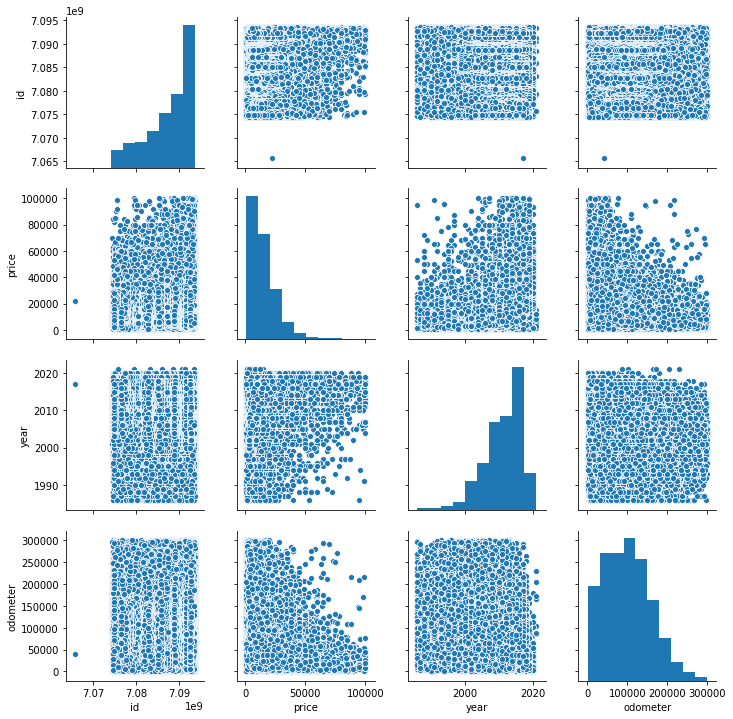

In [39]:
sns.pairplot(df1)

In [38]:
df.set_index(['price', 'year']).sample(5)

id        region                          region_url  \
price year                                                                   
6995  2007.0  7084097973     green bay     https://greenbay.craigslist.org   
      2005.0  7092005542        boston       https://boston.craigslist.org   
3950  2012.0  7092419322        austin       https://austin.craigslist.org   
6800  2007.0  7090833667  grand rapids  https://grandrapids.craigslist.org   
4300  2008.0  7085568363  rhode island   https://providence.craigslist.org   

             manufacturer                model  condition    cylinders fuel  \
price year                                                                    
6995  2007.0          bmw                750li  excellent  8 cylinders  gas   
      2005.0         ford  f-150 xlt supercrew   like new  8 cylinders  gas   
3950  2012.0         ford                focus       good  4 cylinders  gas   
6800  2007.0         audi       a6 3.2 quattro    salvage  4 cylinders  gas   
4300  2008.0        volvo                  v50   like new  5 cylinders  gas   

              odometer title_status transmission                vin drive  \
price year                                                                  
6995  2007.0  113072.0        clean    automatic  WBAHN83597DT73094   rwd   
      2005.0   83000.0        clean    automatic                NaN   rwd   
3950  2012.0  160000.0        clean    automatic                NaN   fwd   
6800  2007.0  120014.0        clean    automatic                NaN   fwd   
4300  2008.0  154000.0        clean    automatic                NaN   rwd   

                     size    type paint_color  \
price year                                      
6995  2007.0    full-size   sedan      silver   
      2005.0  sub-compact  pickup        blue   
3950  2012.0     mid-size   sedan       white   
6800  2007.0      compact   sedan         red   
4300  2008.0      compact   coupe        grey   

                                                    description  county state  
price year                                                                     
6995  2007.0  Apply for in-house financing and this vehicle ...     NaN    wi  
      2005.0  Super clean original paint with excellent inte...     NaN    ma  
3950  2012.0  12 ford focus SEL leather sunroof 4 cyl automa...     NaN    tx  
6800  2007.0  Selling our 2007 Audi A6 AWD With Just 120k Mi...     NaN    mi  
4300  2008.0  2008 Volvo V50 T5 Awd 2.5 turbo Car Needs Noth...     NaN    ri

In [41]:
df.sort_values('year').sample(10)

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,title_status,transmission,vin,drive,size,type,paint_color,description,county,state
21420,7078913750,battle creek,https://battlecreek.craigslist.org,7900,2009.0,lexus,es 350,excellent,6 cylinders,gas,...,clean,automatic,NaN,fwd,mid-size,sedan,black,VISIT US AT www.foggmotors.com CALL/TEXT (269)...,NaN,mi
184385,7089332206,albuquerque,https://albuquerque.craigslist.org,8995,2012.0,jeep,compass,salvage,8 cylinders,gas,...,clean,automatic,1C4NJDBBXCD584591,4wd,full-size,hatchback,black,2012 Jeep Compass Sport 4WD Offered by: Af...,NaN,nm
354315,7092316172,boise,https://boise.craigslist.org,11950,2013.0,lincoln,mkx,excellent,6 cylinders,gas,...,clean,automatic,2LMDJ6JKXDBL33571,fwd,mid-size,SUV,black,"Very nice Lincoln MKX. Lots of power, below bl...",NaN,id
338072,7079902681,lancaster,https://lancaster.craigslist.org,4500,2007.0,ford,escape hybrid,excellent,4 cylinders,hybrid,...,clean,automatic,NaN,4wd,full-size,SUV,black,"This is a nice, garage kept 2007 Ford Escape H...",NaN,pa
200524,7091766863,new hampshire,https://nh.craigslist.org,29944,2011.0,chevrolet,silverado,salvage,8 cylinders,diesel,...,clean,automatic,1GC1KYC8XBF182627,4wd,full-size,pickup,red,2011 Chevrolet Chevy Silverado 2500HD 4WD CREW...,NaN,nh
479131,7084791995,logan,https://logan.craigslist.org,23950,2014.0,chevrolet,corvette stingray,excellent,8 cylinders,gas,...,clean,automatic,1G1YD2D76E5130457,rwd,mid-size,coupe,grey,Elite Motor Cars of MiamiAsk for: Sales Team C...,NaN,ut
388531,7090452374,redding,https://redding.craigslist.org,13999,2004.0,chevrolet,silverado 2500hd,excellent,8 cylinders,gas,...,clean,automatic,1GCHK23U64F239384,4wd,full-size,pickup,black,2004 *** Chevrolet Silverado 2500HD Crew Cab 1...,NaN,ca
341507,7090810332,milwaukee,https://milwaukee.craigslist.org,18998,2018.0,cadillac,ats,excellent,6 cylinders,gas,...,clean,automatic,1G6AE5RX9J0146551,4wd,mid-size,sedan,grey,2018 *** Cadillac ATS 2.0L Turbo Sedan *** ...,NaN,wi
1285,7086620574,greensboro,https://greensboro.craigslist.org,18600,2015.0,toyota,tacoma access cab pickup,good,8 cylinders,gas,...,clean,other,5TFTX4CN9FX053948,4wd,mid-size,pickup,white,Welcome to Carvana—the new way to buy a car (e...,NaN,nc
45734,7083366533,skagit / island / SJI,https://skagit.craigslist.org,18999,2010.0,ford,f-150,excellent,8 cylinders,gas,...,clean,automatic,1FTFW1EV7AFA04807,4wd,compact,truck,white,2010 Ford F-150 HARLEY-DAVIDSON Truck ...,NaN,wa


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382950 entries, 0 to 539758
Data columns (total 21 columns):
id              382950 non-null int64
region          382950 non-null object
region_url      382950 non-null object
price           382950 non-null int64
year            382950 non-null float64
manufacturer    382950 non-null object
model           379765 non-null object
condition       382950 non-null object
cylinders       382939 non-null object
fuel            382950 non-null object
odometer        382950 non-null float64
title_status    382950 non-null object
transmission    382950 non-null object
vin             263028 non-null object
drive           382948 non-null object
size            382944 non-null object
type            382950 non-null object
paint_color     382950 non-null object
description     382948 non-null object
county          0 non-null float64
state           382950 non-null object
dtypes: float64(3), int64(2), object(16)
memory usage: 64.3+ MB


In [42]:
df.drive.value_counts()

4wd    179079
fwd    137026
rwd     66843
Name: drive, dtype: int64

In [43]:
list(df)

['id',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'vin',
 'drive',
 'size',
 'type',
 'paint_color',
 'description',
 'county',
 'state']

In [44]:
df.to_csv('cars_cleaned_test.csv', index=False)

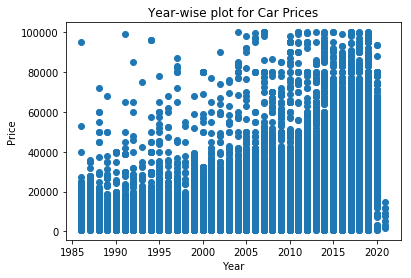

In [45]:
#year-wise plot for car prices
plt.scatter(x=df['year'],y=df['price'])
plt.title('Year-wise plot for Car Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

NameError: name 'pie' is not defined

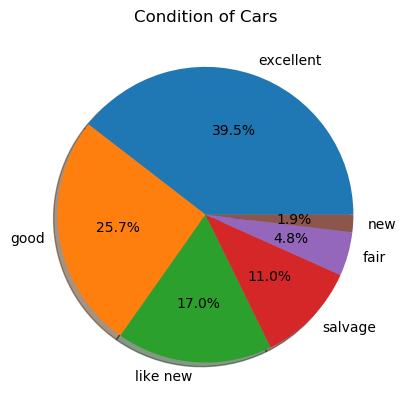

In [57]:
#pie-chart
labels=['excellent','good','like new','salvage','fair','new']
plt.pie(df['condition'].value_counts(),labels=labels,autopct='%1.1f%%',shadow=True)
plt.title("Condition of Cars")
plt.legend(pie[0],labels, bbox_to_anchor=(1.2,0.5), loc="upper right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.show()


In [46]:
manu=df.manufacturer.value_counts().head(10)
manu

ford         71737
chevrolet    56467
toyota       30844
nissan       21511
ram          19672
honda        19558
jeep         19305
gmc          17828
dodge        13105
bmw          11759
Name: manufacturer, dtype: int64

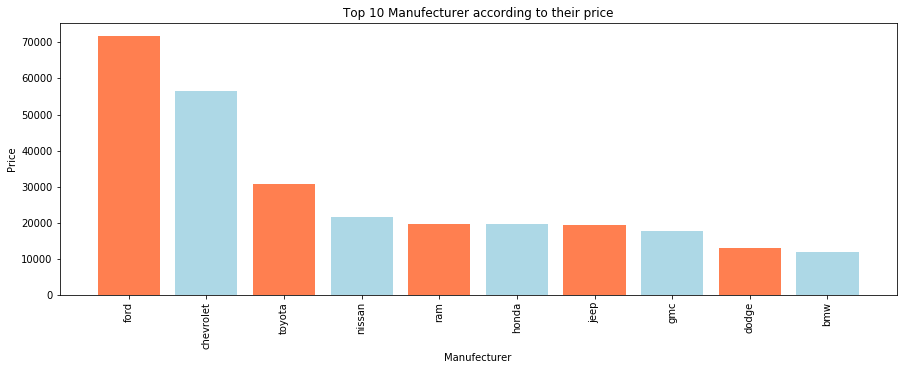

In [49]:
plt.figure(figsize=(15,5))
plt.bar(['ford','chevrolet','toyota','nissan','ram','honda','jeep','gmc','dodge','bmw'],manu,color=("coral","lightblue"))
plt.xticks(rotation=90)
plt.xlabel("Manufecturer")
plt.ylabel("Price")
plt.title("Top 10 Manufecturer according to their price")
plt.show()

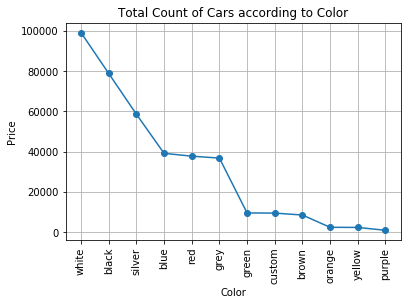

In [47]:
plt.plot(df['paint_color'].value_counts(),marker="o")
plt.xticks(rotation=90)
plt.title("Total Count of Cars according to Color")
plt.xlabel("Color")
plt.ylabel("Price")
plt.grid(True)
plt.show()

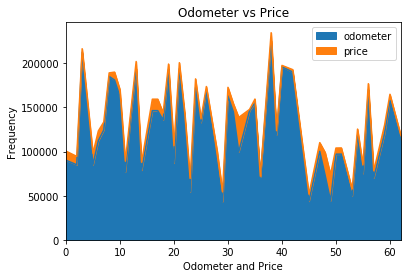

In [51]:
area1=pd.DataFrame(df[['odometer','price']].head(50))
area1.plot.area()
plt.title("Odometer vs Price")
plt.xlabel("Odometer and Price")
plt.ylabel("Frequency")
plt.show()